In [5]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../inkscape/cap6/crankshaft/"
PATH_EPS=BASE_PATH+"/../../../../../eps/cap6/crankshaft/"
fname = "speedup_openmp_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_17810_lumped_p1-p2-p4_openmp.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

NumberThreads  P1_ElapsedTime  P2_ElapsedTime  P4_ElapsedTime  P1_SpeedUp  P2_SpeedUp  P4_SpeedUp  P1_Efficiency  P2_Efficiency  P4_Efficiency  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0              1          9.7037         61.5670        889.9984      1.0000      1.0000      1.0000         1.0000         1.0000         1.0000                 0.15                 0.20                 0.22                 99.87                 99.87                 99.92
1              2          6.2022         33.3536        548.1943      1.5645      1.8458      1.6235         0.7822         0.9229         0.8117                 0.20                 0.21                 0.29                 99.73                 99.69                 99.79
2              4          3.3850         17.7532        279.3519      2.8666      3.4679      3.1859         0.7166         0.8669         0.7964                 0.19                 0.27                 0.29                 98.52                 99.00                 99.67
3              8          1.9739          9.4418        160.1976      4.9160      6.5206      5.5556         0.6145         0.8150         0.6944                 0.22                 0.27                 0.34                 97.92                 98.53                 99.40
4             16          1.5343          6.0019         81.5960      6.3245     10.2579     10.9073         0.3952         0.6411         0.6817                 0.29                 0.30                 0.32                 91.86                 96.05                 98.79
5             20          1.7720          5.1816         72.4358      5.4761     11.8818     12.2867         0.2738         0.5940         0.6143                 0.32                 0.35                 0.39                 93.60                 95.47                 98.14
6             40          1.2140          4.8035         63.6970      7.9931     12.8171     13.9723         0.1998         0.3204         0.3493                 0.31                 0.35                 0.41                 94.02                 95.75                 97.83

In [6]:
# Rename columns
df_speedup = df.rename(columns={"P1_SpeedUp": "P1", "P2_SpeedUp": "P2", "P4_SpeedUp": "P4"})
df_speedup.columns

Index(['NumberThreads', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1', 'P2', 'P4', 'P1_Efficiency', 'P2_Efficiency', 'P4_Efficiency',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

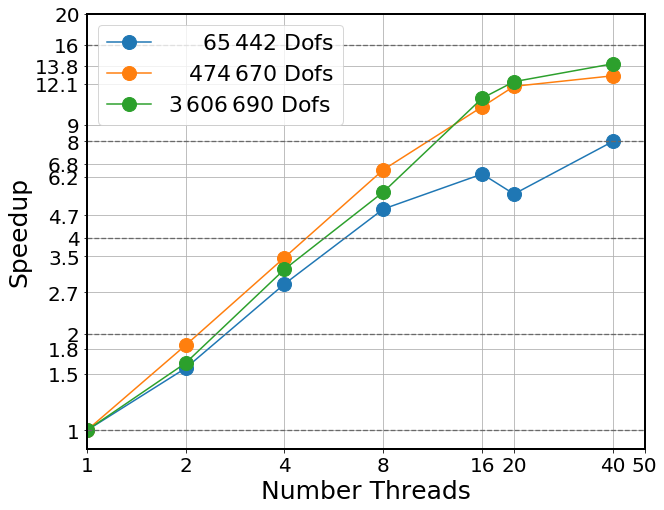

In [7]:
select_columns=['NumberThreads', 'P1', 'P2', 'P4']

fig = df_speedup[select_columns].plot(
    kind='line', 
    x='NumberThreads', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50], fontsize=20)
plt.yticks([1, 1.5, 1.8, 2, 2.7, 3.5, 4, 4.7, 6.2, 6.8, 8, 9, 12.1, 13.8, 16, 20], [1, 1.5, 1.8, 2, 2.7, 3.5, 4, 4.7, 6.2, 6.8, 8, 9, 12.1, 13.8, 16, 20], fontsize=20)

lines = [1, 2, 4, 8, 16]
for i in lines:
    plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('Speedup', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [8]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [9]:
# Rename columns
df_efficiency = df.rename(columns={"P1_Efficiency": "P1", "P2_Efficiency": "P2", "P4_Efficiency": "P4"})
df_efficiency.columns

Index(['NumberThreads', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1_SpeedUp', 'P2_SpeedUp', 'P4_SpeedUp', 'P1', 'P2', 'P4',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

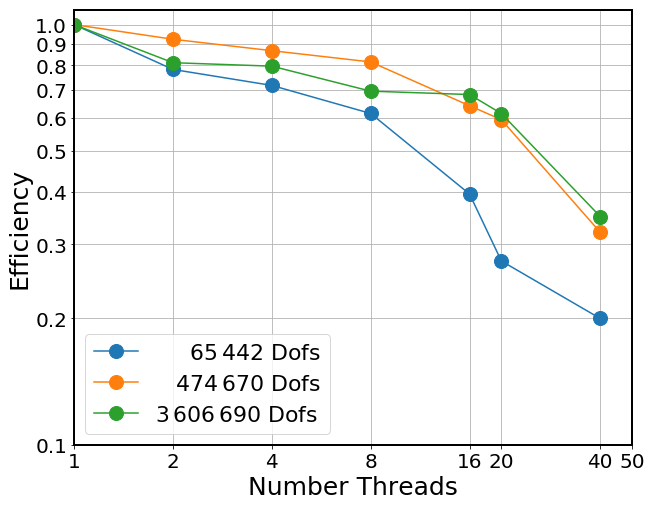

In [10]:
select_columns=['NumberThreads', 'P1', 'P2', 'P4']

fig = df_efficiency[select_columns].plot(
    kind='line', 
    x='NumberThreads', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50], fontsize=20)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('Efficiency', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [11]:
fname = "efficiency_openmp_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [12]:
# Select columns
select_columns=['NumberThreads', 'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)']
df_cache = df[select_columns].copy()
# Calculate percentage multiply by 100.
df_cache["P1_L2-Cache-Miss(%)"] = df_cache["P1_L2-Cache-Miss(%)"]*100
df_cache["P2_L2-Cache-Miss(%)"] = df_cache["P2_L2-Cache-Miss(%)"]*100
df_cache["P4_L2-Cache-Miss(%)"] = df_cache["P4_L2-Cache-Miss(%)"]*100
df_cache

NumberThreads  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)
0              1                 15.0                 20.0                 22.0
1              2                 20.0                 21.0                 29.0
2              4                 19.0                 27.0                 29.0
3              8                 22.0                 27.0                 34.0
4             16                 29.0                 30.0                 32.0
5             20                 32.0                 35.0                 39.0
6             40                 31.0                 35.0                 41.0

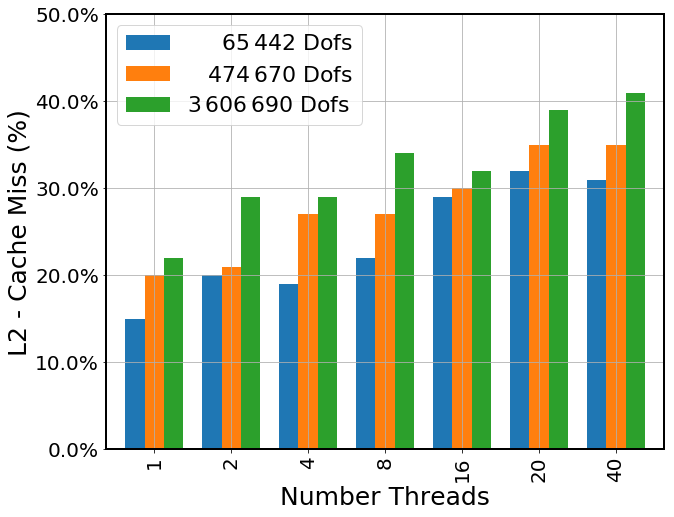

In [13]:
fig = df_cache[["NumberThreads", "P1_L2-Cache-Miss(%)", "P2_L2-Cache-Miss(%)", "P4_L2-Cache-Miss(%)"]].plot(
    kind='bar', 
    x='NumberThreads',
    width=0.75,
    figsize=(10, 8)
).get_figure()

# plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50])
plt.xticks(fontsize=20)
plt.yticks([0.0, 10.0, 20.0, 30.0, 40.0, 50.0], ["0.0%", "10.0%", "20.0%", "30.0%", "40.0%", "50.0%"], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('L2 - Cache Miss (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [14]:
fname = "l2-cache-miss_openmp_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [15]:
# Select columns
select_columns=['NumberThreads', 'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)']
df_region = df[select_columns].copy()
df_region

NumberThreads  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0              1                 99.87                 99.87                 99.92
1              2                 99.73                 99.69                 99.79
2              4                 98.52                 99.00                 99.67
3              8                 97.92                 98.53                 99.40
4             16                 91.86                 96.05                 98.79
5             20                 93.60                 95.47                 98.14
6             40                 94.02                 95.75                 97.83

In [16]:
fig = df_region.plot(
    kind='line', 
    x='NumberThreads',
    marker='o',
    markersize=16,
#     alpha=0.3,
    linewidth=3.0,
#     ylim=(0,300),
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50])
# plt.yticks([50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0], [50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0])


xs=list(df_region["NumberThreads"][3:7])+list(df_region["NumberThreads"][3:7])+list(df_region["NumberThreads"][3:7])
ys=list(df_region["P1_ParallelRegion(%)"][3:7])+list(df_region["P2_ParallelRegion(%)"][3:7])+list(df_region["P4_ParallelRegion(%)"][3:7])
print(ys)

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 fontsize=22,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('Parallel Region OpenMP (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.35, 0.22), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

[97.92, 91.86, 93.6, 94.02, 98.53, 96.05, 95.47, 95.75, 99.4, 98.79, 98.14, 97.83]


In [17]:
fname = "parallel_region_openmp_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>